# Heart Disease Prediction System

### 0. Introduction

Heart disease, also referred as cardiovascular diseases, is broad term used for diseases and conditions affecting the heart and circulatory system. It is a major cause of disability all around the world. Since heart is amongst the most vital organs of the body, its diseases affect other organs and part of the body as well. There are several different types and forms of heart diseases. The most common ones cause narrowing or blockage of the coronary arteries, malfunctioning in the valves of the heart, enlargement in the size of heart and several others leading to heart failure and heart attack.

### 1. Data Dictionary

1. age: age in years
2. sex: sex
   - 1 = male
   - 0 = female
3. cp: chest pain type
   - Value 0: typical angina
   - Value 1: atypical angina
   - Value 2: non-anginal pain
   - Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)
   - 1 = true;
   - 0 = false
7. restecg: resting electrocardiographic results
   - Value 0: normal
   - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina
   - 1 = yes
   - 0 = no
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    - Value 0: upsloping
    - Value 1: flat
    - Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal:
    - 0 = error (in the original dataset 0 maps to NaN's)
    - 1 = fixed defect
    - 2 = normal
    - 3 = reversable defect
14. target (the lable):
    - 0 = no disease,
    - 1 = disease


##### Note on the target label:

Diagnosis of heart disease (angiographic disease status)
- Value 0: < 50% diameter narrowing
- Value 1: > 50% diameter narrowing

Notes from the discussion forum of the dataset:
- data #93, 159, 164, 165 and 252 have ca=4 which is incorrect. In the original Cleveland dataset they are NaNs.
- data #49 and 282 have thal = 0, also incorrect. They are also NaNs in the original dataset.

Action: Drop the faulty data! (7 data entry will be dropped)

### 2. Importing the dependencies

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import KFold
from xgboost import XGBClassifier 
from sklearn.naive_bayes import GaussianNB
import pickle

### 3. Data Collection and Processing

In [70]:
df = pd.read_csv("E:\Multiple Disease Prediction\Datasets\heart_disease_data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19432\4085389141.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("E:\Multiple Disease Prediction\Datasets\heart_disease_data.csv")


In [71]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [73]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [74]:
df.shape

(303, 14)

In [75]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

##### 3.1 Missing Values


In [76]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [77]:
df['ca'].value_counts()

ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

In [78]:
df = df.drop(df[df['ca']==4].index)

In [79]:
df.shape

(298, 14)

In [80]:
df['ca'].unique()

array([0, 2, 1, 3], dtype=int64)

In [81]:
df['thal'].value_counts()

thal
2    163
3    115
1     18
0      2
Name: count, dtype: int64

In [82]:
df = df.drop(df[df['thal']==0].index)

In [83]:
df['thal'].value_counts()

thal
2    163
3    115
1     18
Name: count, dtype: int64

##### 3.2 Duplicate Values

In [84]:
df.duplicated().sum()

0

In [85]:
df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


##### 3.3 Feature Engineering

In [86]:
NewChol = pd.Series(['Normal', 'Borderline', 'High'], dtype = "category")
df["NewChol"] = NewChol
df.loc[df["chol"] < 200, "NewChol"] = NewChol[0]
df.loc[(df["chol"] >= 200) & (df["chol"] <= 239), "NewChol"] = NewChol[1]
df.loc[df["chol"] > 240 ,"NewChol"] = NewChol[2]

In [87]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,NewChol
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Borderline
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,High
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Borderline
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Borderline
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,High


In [88]:
NewTrestbps = pd.Series(['Normal', 'Elevated', 'Stage_1_Hypertension', 'Stage_2_HyperTension'], dtype = "category")
df["NewTrestbps"] = NewTrestbps
df.loc[df["trestbps"] < 120, "NewTrestbps"] = NewTrestbps[0]
df.loc[(df["trestbps"] >= 120) & (df["trestbps"] <= 129), "NewTrestbps"] = NewTrestbps[1]
df.loc[(df["trestbps"] >= 130) & (df["trestbps"] <= 139), "NewTrestbps"] = NewTrestbps[2]
df.loc[df["trestbps"] >= 140 ,"NewTrestbps"] = NewTrestbps[3]

In [89]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,NewChol,NewTrestbps
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Borderline,Stage_2_HyperTension
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,High,Stage_1_Hypertension
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Borderline,Stage_1_Hypertension
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Borderline,Elevated
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,High,Elevated


##### 3.4 One Hot Encoding

In [90]:
df = pd.get_dummies(df, columns = ["NewChol", "NewTrestbps"], drop_first=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,NewChol_High,NewChol_Normal,NewTrestbps_Normal,NewTrestbps_Stage_1_Hypertension,NewTrestbps_Stage_2_HyperTension
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,False,False,False,False,True
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,True,False,False,True,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,False,False,False,True,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,False,False,False,False,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,True,False,False,False,False


In [91]:
df = df.replace({True:1, False:0})
df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19432\2162250320.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True:1, False:0})


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,NewChol_High,NewChol_Normal,NewTrestbps_Normal,NewTrestbps_Stage_1_Hypertension,NewTrestbps_Stage_2_HyperTension
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,0,0,0,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0,0


##### 3.5 Normalization

In [92]:
for features in df.columns:
    print(features, len(df[features].unique()))

age 41
sex 2
cp 4
trestbps 49
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 4
thal 3
target 2
NewChol_High 2
NewChol_Normal 2
NewTrestbps_Normal 2
NewTrestbps_Stage_1_Hypertension 2
NewTrestbps_Stage_2_HyperTension 2


In [93]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

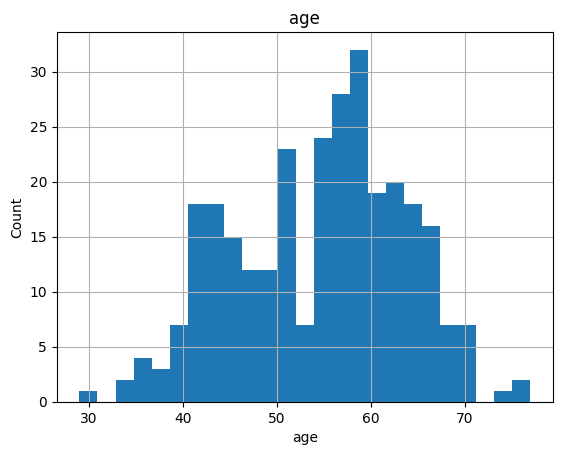

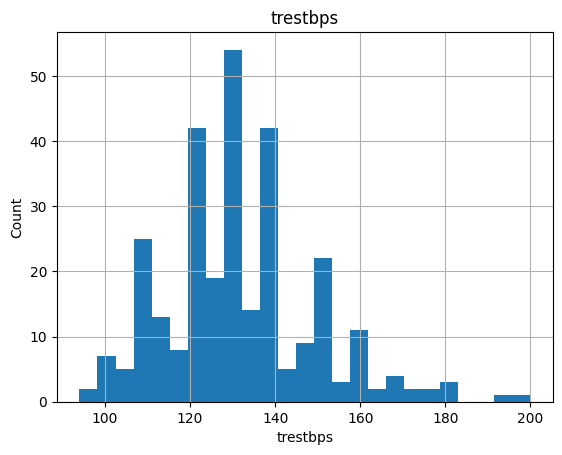

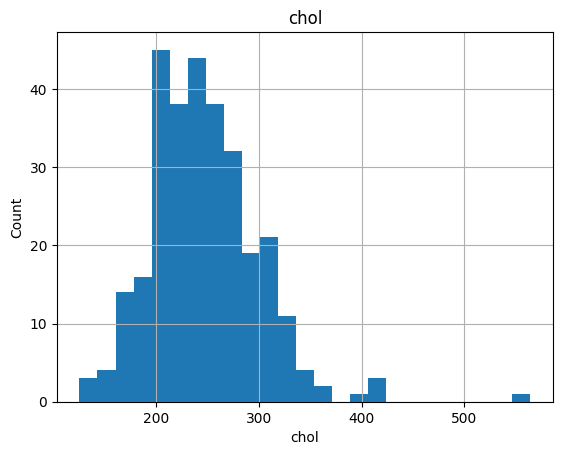

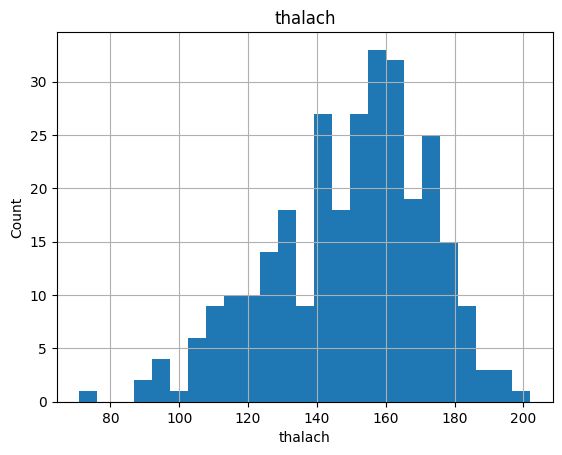

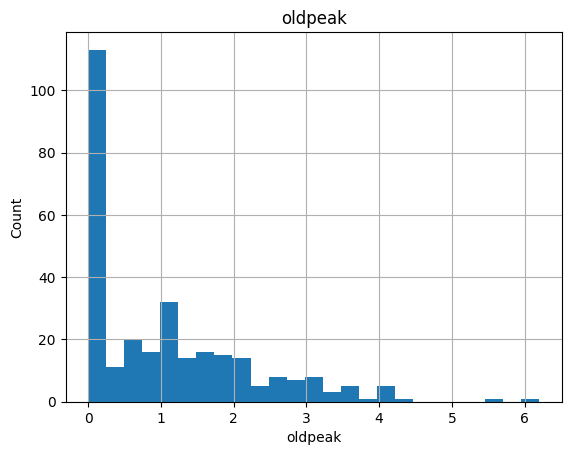

In [94]:
for feature in continuous_features:
    df[feature].hist(bins=25)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

c:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (296). n_quantiles is set to n_samples.
  warnings.warn(


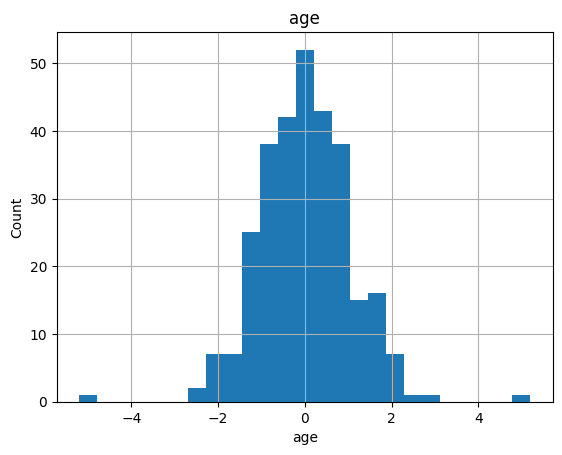

c:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (296). n_quantiles is set to n_samples.
  warnings.warn(


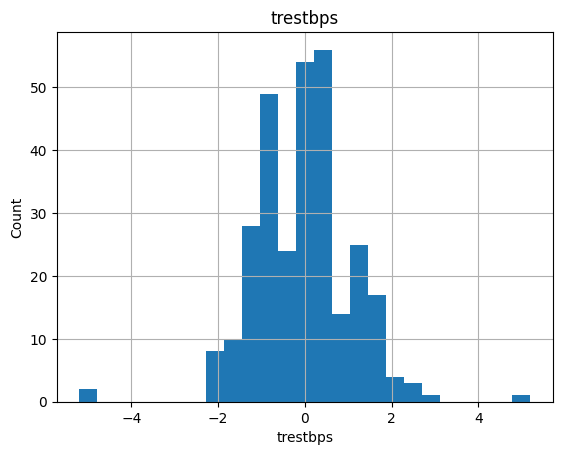

c:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (296). n_quantiles is set to n_samples.
  warnings.warn(


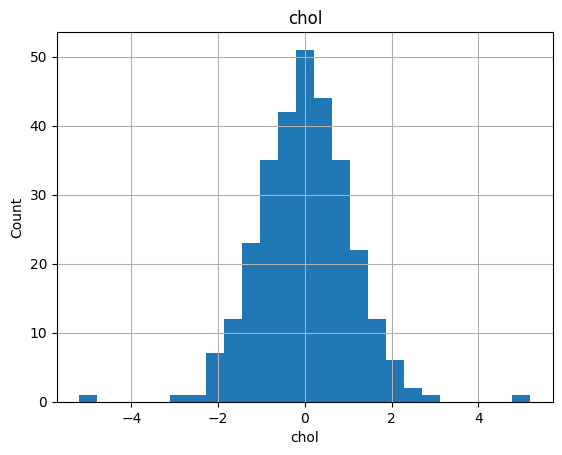

c:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (296). n_quantiles is set to n_samples.
  warnings.warn(


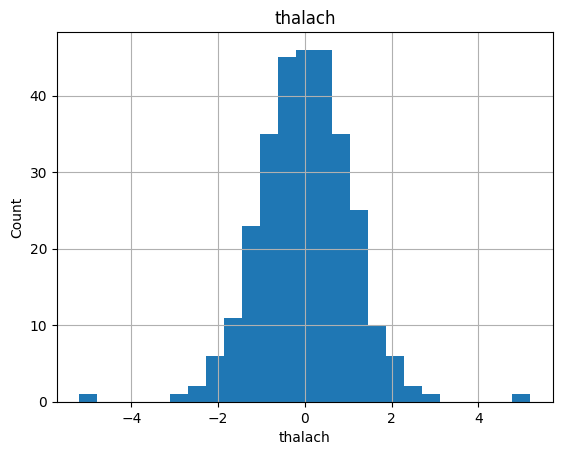

c:\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (296). n_quantiles is set to n_samples.
  warnings.warn(


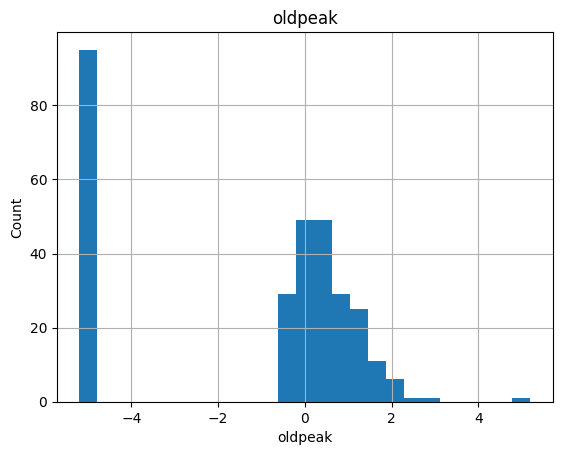

In [95]:
qt = QuantileTransformer(output_distribution='normal')
for feature in continuous_features:
    qt = QuantileTransformer(output_distribution='normal')
    df[feature] = qt.fit_transform(df[[feature]])
    df[feature].hist(bins=25)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


In [96]:
# Save the scaler to a file
with open('E:\Multiple Disease Prediction\Saved Quantile Transformer\heart_quantile.pkl', 'wb') as file:
    pickle.dump(qt, file)

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19432\1200378409.py:2: SyntaxWarning: invalid escape sequence '\M'
  with open('E:\Multiple Disease Prediction\Saved Quantile Transformer\heart_quantile.pkl', 'wb') as file:


##### 3.6 Outliers

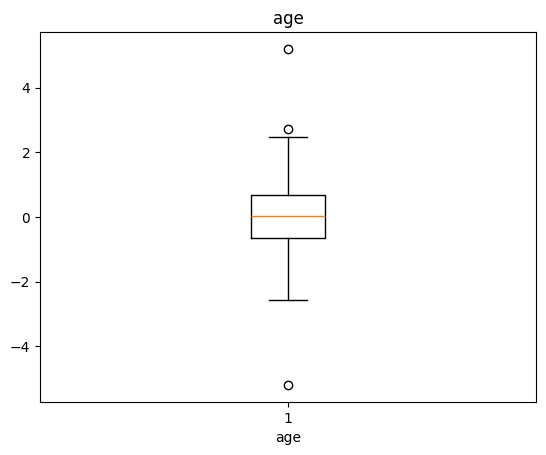

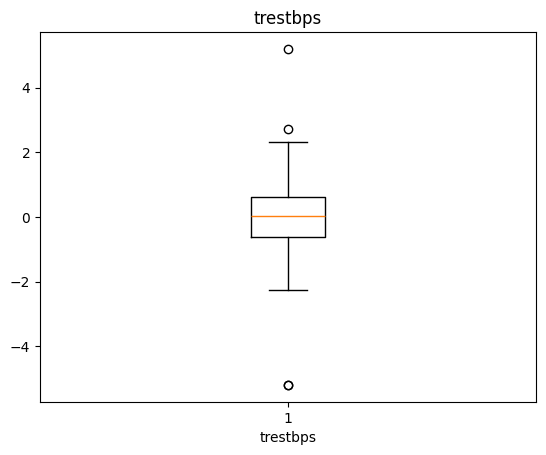

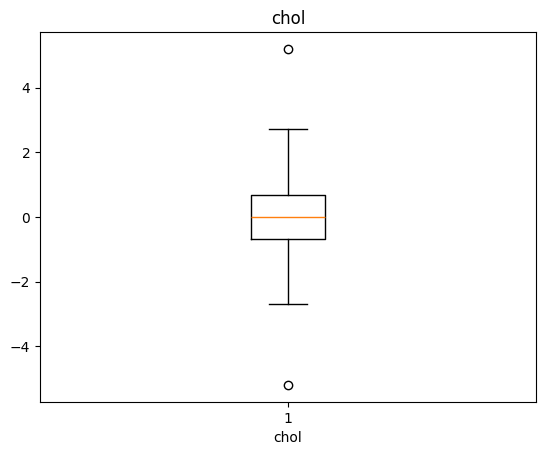

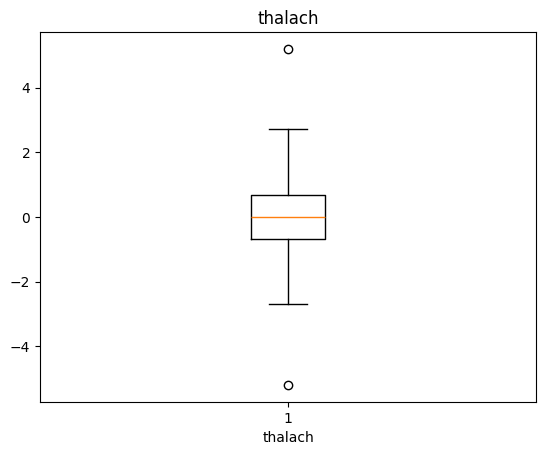

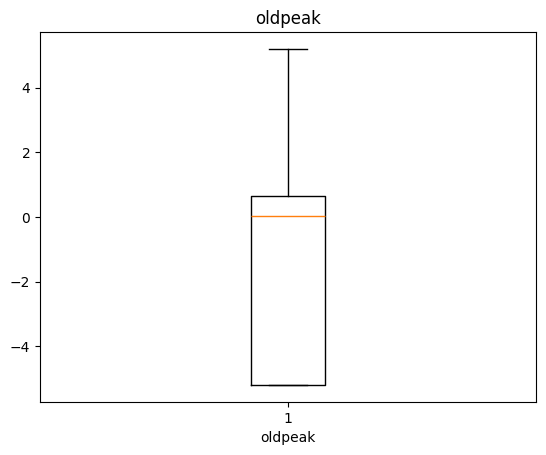

In [97]:
for feature in continuous_features:
    plt.boxplot(x = feature, data = df)
    plt.title(feature)
    plt.xlabel(feature)
    plt.show()

##### 3.7 Correlation

<Axes: >

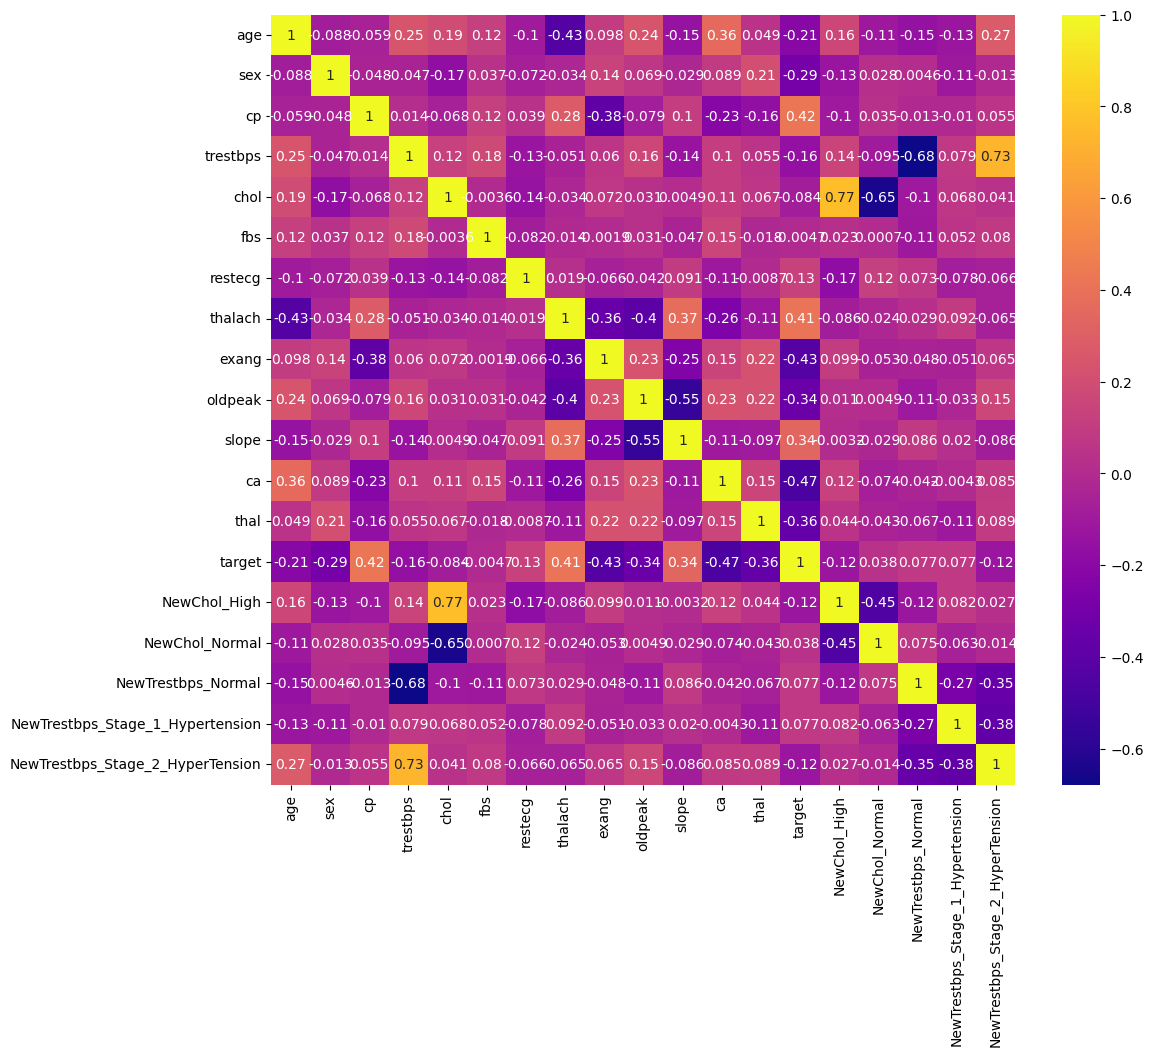

In [98]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.plasma)

### 4. Data Preparation for Model Training

##### 4.1 Splitting Target Variable

In [99]:
X = df.drop(columns='target', axis=1)
y = df['target']

In [100]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,NewChol_High,NewChol_Normal,NewTrestbps_Normal,NewTrestbps_Stage_1_Hypertension,NewTrestbps_Stage_2_HyperTension
0,0.891089,1,3,0.866090,-0.205363,1,0,-0.132087,0,1.047400,0,0,1,0,0,0,0,1
1,-1.952765,1,2,0.016995,0.175080,0,1,2.046798,0,1.705316,0,0,2,1,0,0,1,0
2,-1.454663,0,1,0.016995,-0.866090,0,0,0.990287,0,0.452585,2,0,2,0,0,0,1,0
3,0.029744,1,1,-0.624646,-0.106414,0,1,1.331420,0,0.021244,2,0,2,0,0,0,0,0
4,0.153548,0,0,-0.624646,2.046798,0,1,0.553880,1,-0.102142,2,0,2,1,0,0,0,0


In [101]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

##### 4.2 Standardization

In [102]:
sc = StandardScaler()
sc.fit(X[continuous_features])

StandardScaler()

In [103]:
# Save the scaler to a file
with open('E:\Multiple Disease Prediction\Saved Scalers\heart_scaler.pkl', 'wb') as file:
    pickle.dump(sc, file)

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19432\2803134020.py:2: SyntaxWarning: invalid escape sequence '\M'
  with open('E:\Multiple Disease Prediction\Saved Scalers\heart_scaler.pkl', 'wb') as file:


In [104]:
X = pd.concat([X[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'NewChol_High', 'NewChol_Normal', 'NewTrestbps_Normal', 'NewTrestbps_Stage_1_Hypertension', 'NewTrestbps_Stage_2_HyperTension']].reset_index(drop=True), pd.DataFrame(sc.transform(X[continuous_features]), columns = continuous_features)], axis=1)

In [105]:
X.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,NewChol_High,NewChol_Normal,NewTrestbps_Normal,NewTrestbps_Stage_1_Hypertension,NewTrestbps_Stage_2_HyperTension,age,trestbps,chol,thalach,oldpeak
0,1,3,1,0,0,0,0,1,0,0,0,0,1,0.832608,0.797594,-0.192385,-0.124013,0.853106
1,1,2,0,1,0,0,0,2,1,0,0,1,0,-1.830489,0.021892,0.163407,1.914051,1.092232
2,0,1,0,0,0,2,0,2,0,0,0,1,0,-1.364046,0.021892,-0.810300,0.925822,0.636914
3,1,1,0,1,0,2,0,2,0,0,0,0,0,0.026010,-0.564286,-0.099847,1.244908,0.480139
4,0,0,0,1,1,2,0,2,1,0,0,0,0,0.141945,-0.564286,1.913847,0.517620,0.435293


##### 4.3 Train-Test Split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=42)

### 5. Model Training

##### 5.1 Logistic Regression

In [107]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict =  lr.predict(X_test)
lr_score = accuracy_score(lr_predict, y_test)
print(lr_score)

0.8833333333333333


##### 5.2 Decision Tree Classifier

In [108]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)
DT_acc = accuracy_score(y_test, DT_pred)
DT_acc

0.7666666666666667

In [109]:
# hyperparameter tuning of dt
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','radom'],
    'min_samples_leaf':[1,2,3,5,7], 
    'min_samples_split':[1,2,3,5,7], 
    'max_features':['auto','sqrt','log2']
}
grid_search_dt = GridSearchCV(DT, grid_param, cv=10, n_jobs=-1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


c:\Python\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
8800 fits failed out of a total of 12000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2220 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Python\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'radom']},
             verbose=1)

In [110]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'splitter': 'best'}

In [111]:
grid_search_dt.best_score_

0.817572463768116

In [112]:
DT = grid_search_dt.best_estimator_
DT_pred = DT.predict(X_test)
DT_acc = accuracy_score(DT_pred, y_test)
DT_acc

0.8166666666666667

##### 5.3 SVM Classifier

In [113]:
svc = SVC(probability=True)
parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05,0.5, 0.01, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [114]:
grid_search.best_params_

{'C': 15, 'gamma': 0.001}

In [115]:
grid_search.best_score_

0.834485815602837

In [116]:
svc = SVC(C=1, gamma = 0.1, probability=True)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, svc_pred)
svc_acc

0.8666666666666667

##### 5.4 K-nearest Neighbour Classifier

In [117]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn_score = accuracy_score(y_test, y_pred)
knn_score

0.8

##### 5.5 Gradient Boosting Classifier

In [118]:
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


c:\Python\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
160 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Python\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_const

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [119]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 150}

In [120]:
grid_search_gbc.best_score_

0.8010869565217391

In [121]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 100)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential')

In [122]:
gbc = grid_search_gbc.best_estimator_
y_pred = gbc.predict(X_test)
gbc_acc = accuracy_score(y_test, y_pred)
gbc_acc

0.8166666666666667

##### 5.6 XG Boost Classifier

In [123]:
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [124]:
y_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred)
xgb_acc

0.8166666666666667

##### 5.7 Random Forest Classifier

In [125]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [126]:
y_pred = rand_clf.predict(X_test)
rand_acc = accuracy_score(y_test, y_pred)
rand_acc

0.8166666666666667

##### 5.8 Gaussian Naive Bayes

In [127]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, y_pred)
gnb_accuracy

0.85

##### 5.9 MLP Classifier

In [128]:
mlp  = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, y_pred)
mlp_accuracy

c:\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.85

### 6. Model Comparison

In [129]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN Classifier', 'SVM Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost Classifier', 'GaussianNB Classifier', 'MLP Classifier'],
    'Score': [100*round(lr_score,4), 100*round(knn_score,4), 100*round(svc_acc,4), 100*round(DT_acc,4), 100*round(rand_acc,4), 
              100*round(gbc_acc,4), 100*round(xgb_acc,4), 100*round(gnb_accuracy,4), 100*round(mlp_accuracy,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,88.33
2,SVM Classifier,86.67
7,GaussianNB Classifier,85.00
8,MLP Classifier,85.00
3,Decision Tree Classifier,81.67
4,Random Forest Classifier,81.67
5,Gradient Boosting Classifier,81.67
6,XgBoost Classifier,81.67
1,KNN Classifier,80.00


### 7. Selecting the Model

In [130]:
model = svc
model_predict =  model.predict(X_test)
model_score = accuracy_score(model_predict, y_test)
print(model_score)

0.8666666666666667


### 8. Saving the Model

In [131]:
filename = 'E:\Multiple Disease Prediction\Saved Models\heart_disease_model.sav'
pickle.dump(model,open(filename,'wb'))

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19432\2192690024.py:1: SyntaxWarning: invalid escape sequence '\M'
  filename = 'E:\Multiple Disease Prediction\Saved Models\heart_disease_model.sav'
